In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# Scenario 1
Joe is a private contractor. He has taken a job for an electrical company. 
The electrical company has been paying out large amounts of money for workman’s comp claims,
and they believe some of those claims are fraudulent. The electrical company wants Joe to run surveillance to determine if the rate of fraud is higher than what the 
industry normally reports. Specifically, they want to know if the incidence of fraud among
claimants is more than 21%.
They provide Joe with a random sample of 82 claimants who have been diagnosed
as unable to perform any manual labor beyond light housekeeping activities. The company 
asked Joe to observe the sample, and report back to them how many of the claimants are 
obviously doing things that are much more strenuous than light housekeeping, such as strenuous 
yard work, hiking, or other strenuous sporting activities, etc.
Joe spends about two months completing his observations, and report back to the
electrical company that 27 of the 82 claimants are not nearly as “disabled” as their diagnosis
suggests. The electrical company wants to test the data.
Complete a report for grading. The only data you need is to know that 27 of the 82 claimants 
are not nearly as “disabled” as their diagnosis suggests, and the hypothetical level of fraud 
is 21%.



In [2]:
t, p = proportions_ztest(27, 82, 0.21)
t, p

(2.298172132699192, 0.021551994102805068)

# Scenario 2
Medical researchers are trying to understand if four vaccines are being used in the same ratio at three different clinics in town. They have access to medical records over the past 3 years, and have recorded each treatment where the vaccine was used.

Using a tally sheet, they have determined how many times each vaccine was used in each of the three clinics, and they want to compare the vaccine usage across the three clinics.

Complete a report for grading. The data can be found in the following file: 

In [3]:
df2 = pd.read_csv('../Data/Vaccines.csv')
df2.rename(columns={'Vaccine Type ': "VT", "Number of applications": "Count"}, inplace=True)
df2_expanded = df2.copy()

In [4]:
df2_pivot = pd.pivot_table(df2,index='VT',columns='Clinic',values="Count")
df2_pivot

Clinic,1,2,3
VT,,,
A,13,32,87
B,81,124,298
C,7,18,37
D,39,68,162


In [5]:
for i in df2.index:
    df2_expanded = df2_expanded.append([df2.iloc[i,:]]*(df2.iloc[i,2]-1),ignore_index=True)

In [6]:
df2_crosstab = pd.crosstab(df2_expanded['Clinic'], df2_expanded['VT']).transpose()
df2_crosstab

Clinic,1,2,3
VT,,,
A,13,32,87
B,81,124,298
C,7,18,37
D,39,68,162


In [7]:
stats.chi2_contingency(df2_crosstab)

(4.547864846893754,
 0.6029630138203068,
 6,
 array([[ 19.13043478,  33.06832298,  79.80124224],
        [ 72.89855072, 126.01035197, 304.09109731],
        [  8.98550725,  15.5320911 ,  37.48240166],
        [ 38.98550725,  67.38923395, 162.6252588 ]]))

In [8]:
stats.chi2_contingency(df2_pivot)

(4.547864846893754,
 0.6029630138203068,
 6,
 array([[ 19.13043478,  33.06832298,  79.80124224],
        [ 72.89855072, 126.01035197, 304.09109731],
        [  8.98550725,  15.5320911 ,  37.48240166],
        [ 38.98550725,  67.38923395, 162.6252588 ]]))

# Scenario 3
A Bank is interested in the amount of coins each demographic group has. They have demographic data for all of their bank holders, and has split them into 4 different 

They are going to use the results to do some targeted marketing. In order to determine savings practices, they are going to use the average savings account balance over the past 3 months for their account holders. In other words, they will have one number (average account balance) for each account.

Each demographic group has between 40 and 60 accounts they will look at.

Complete a report for grading. The data can be found in this file.

In [9]:
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [10]:
Coins = pd.read_csv('../Data/Coins.csv')
Coins.head()

,Bank A,Bank B,Bank C,Bank D,Bank E
0,15515.50,23231.72,14202.23,23231.72,23231.72
1,22620.97,17258.06,13988.59,12880.28,5156.36
2,18788.25,20652.91,5970.47,24071.53,19729.92
3,15284.78,20845.06,10687.73,14020.00,4892.59
4,19501.43,22296.64,9214.33,16467.70,14099.38


In [11]:
Coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bank A  42 non-null     float64
 1   Bank B  39 non-null     float64
 2   Bank C  48 non-null     float64
 3   Bank D  40 non-null     float64
 4   Bank E  42 non-null     float64
dtypes: float64(5)
memory usage: 2.4 KB


In [12]:
Coins_expanded=pd.melt(Coins,var_name='Bank', value_name='$')

In [13]:
Coins_expanded = Coins_expanded.replace(Coins.columns, [0,1,2,3,4])

In [14]:
Coins_expanded.head()

,Bank,$
0,0,15515.50
1,0,22620.97
2,0,18788.25
3,0,15284.78
4,0,19501.43


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

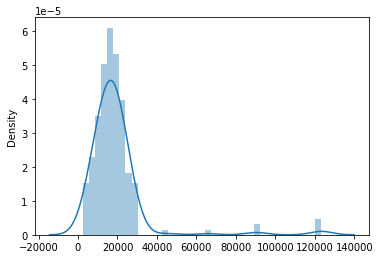

In [15]:
sns.distplot(Coins.values[~np.isnan(Coins.values)])

In [16]:
scipy.stats.bartlett(Coins_expanded['$'], Coins_expanded['Bank'])

BartlettResult(statistic=4989.9294590113395, pvalue=0.0)

In [17]:
scipy.stats.fligner(Coins_expanded['$'], Coins_expanded['Bank'])

FlignerResult(statistic=363.2622659837988, pvalue=5.485847061720827e-81)

In [18]:
data = [Coins[col].dropna() for col in Coins]

In [19]:
stats.f_oneway(*data)

F_onewayResult(statistic=3.2157737128647015, pvalue=0.013770834261118152)

# Scenario 4
The State college conducted a poll to gauge public sentiment about a student board. They asked respondents if they favored or opposed the board in the upcoming School's election.

Complete a report for grading. The counts for the different groups are as follows:

With school students and favorable - 487
With school students and unfavorable - 114
Without school students and favorable - 180
Without school students and unfavorable - 174
Use these data to complete your analysis, and use alpha = 0.05.

In [20]:
t, p = proportions_ztest([487, 180], [487+114, 180+174])
t, p

(9.81658505283971, 9.552478231292934e-23)